# AUTHOR= ADITYA SONI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data=pd.read_csv("MSFT.txt")

In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200
8856,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [5]:
data.rolling(window=5).mean()

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.097743,0.102257,0.096528,0.099653,0.063294,317756160.0
...,...,...,...,...,...,...
8852,260.053998,261.920001,258.089999,260.483997,260.483997,24375340.0
8853,259.481995,261.092004,257.229999,259.279999,259.279999,28949880.0
8854,258.531998,259.956006,255.901999,258.347995,258.347995,31946440.0
8855,256.903998,258.270004,254.368002,256.553995,256.553995,33839760.0


In [6]:
data.rolling(window=5).std()

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005476,0.001132,0.004690,0.002073,0.001316,4.121063e+08
...,...,...,...,...,...,...
8852,1.650717,0.949818,1.989212,1.922225,1.922225,4.343484e+06
8853,2.440046,2.626187,3.075869,3.264058,3.264058,1.093403e+07
8854,2.955894,3.375710,4.853626,4.462456,4.462456,1.180682e+07
8855,4.964155,4.365580,5.484267,4.841356,4.841356,1.037792e+07


In [7]:
# exponential weighted functions
data['ewm'] = data['Adj Close'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ewm
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,0.061751
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,0.061961
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0.062256
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.062365
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.062359


In [8]:
data['Date'] = pd.to_datetime(data['Date'] , format = "%Y-%m-%d")

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ewm
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,0.061751
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,0.061961
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0.062256
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.062365
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.062359


In [10]:

data['Buy_Sell_on_Open'] = np.where(data['Open'].shift(-1) > data['Open'],1,0)
data['Buy_Sell'] = np.where(data['Adj Close'].shift(-1) > data['Adj Close'],1,0)
data['Returns'] = data['Adj Close'].pct_change()
data = data.dropna()


In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ewm,Buy_Sell_on_Open,Buy_Sell,Returns
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,0.061961,1,1,0.035713
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0.062256,1,0,0.017250
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.062365,0,0,-0.025432
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.062359,0,0,-0.017391
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060648,58435200,0.062196,0,0,-0.026547


C:\Users\win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Adj Close'>

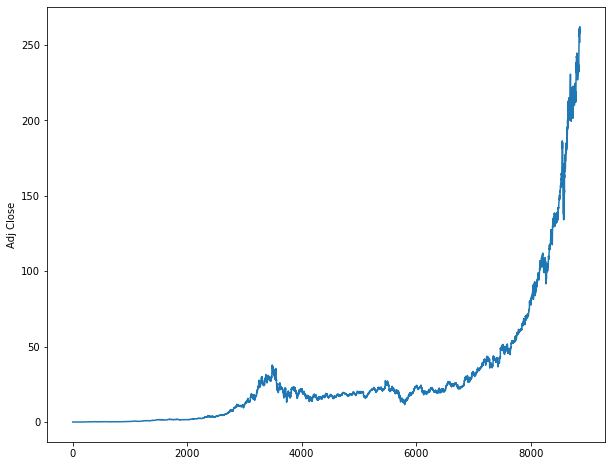

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.lineplot(data.index ,data['Adj Close'])

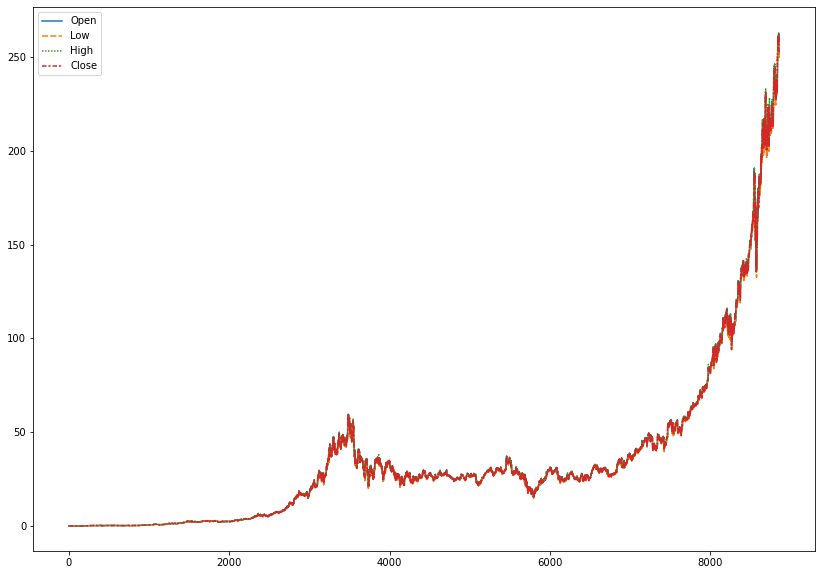

In [13]:
# Plot Multi lines
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax = sns.lineplot(data=data[['Open', 'Low', 'High', 'Close']])

<AxesSubplot:xlabel='Open', ylabel='Close'>

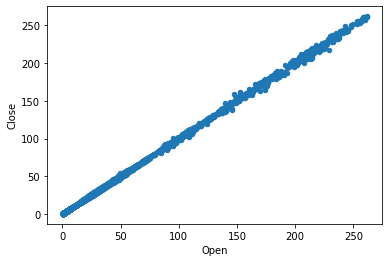

In [14]:
# Scatterplot
data.plot(kind="scatter", x="Open", y="Close")

C:\Users\win-10\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


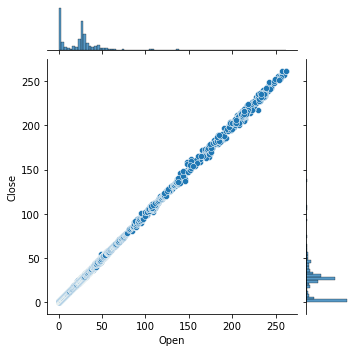

In [15]:
# bivariate scatterplots and univariate histograms
sns.jointplot(x="Open", y="Close", data=data, size=5)

C:\Users\win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


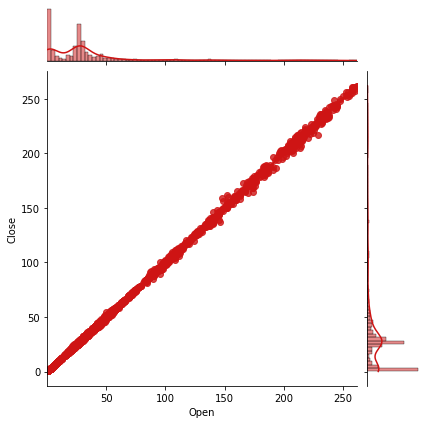

In [16]:
sns.jointplot(data.loc[:,'Open'], data.loc[:,'Close'], kind="reg", color="#ce1414")

In [17]:
# UNDERSTANDING DATA

In [18]:
print("Exploratory Data Analysis")
print("Stock Data")
print('-'*40)
print("Data information") 
print(data.info(memory_usage='deep',verbose=False))
print('-'*40)
print(data.info())
print('-'*40)
print("Data type:")
print(data.dtypes)
print('-'*40)
print("Check unique values without NaN")
print(data.nunique())
print('-'*40)
print("Data shape:")
print(data.shape)
print('-'*40)
print("Data columns Names:")
print(data.columns)
print('-'*40)
print("Check for NaNs:")
print(data.isnull().values.any())
print('-'*40)
print("How many NaN it has in each columns?")
print(data.isnull().sum())
print('-'*40)
print("Data Statistics Summary:")
print(data.describe())

Exploratory Data Analysis
Stock Data
----------------------------------------
Data information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 1 to 8856
Columns: 11 entries, Date to Returns
dtypes: datetime64[ns](1), float64(7), int32(2), int64(1)
memory usage: 761.1 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 1 to 8856
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8856 non-null   datetime64[ns]
 1   Open              8856 non-null   float64       
 2   High              8856 non-null   float64       
 3   Low               8856 non-null   float64       
 4   Close             8856 non-null   float64       
 5   Adj Close         8856 non-null   float64       
 6   Volume            8856 non-null   int64         
 7   ewm               8856 non-null   float64       
 8   Buy_Sell_on_Ope

In [19]:
# Check for type of data in each columns
data.dtypes

Date                datetime64[ns]
Open                       float64
High                       float64
Low                        float64
Close                      float64
Adj Close                  float64
Volume                       int64
ewm                        float64
Buy_Sell_on_Open             int32
Buy_Sell                     int32
Returns                    float64
dtype: object

In [20]:
data.shape

(8856, 11)

In [21]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  8856.000000  8856.000000  8856.000000  8856.000000  8856.000000   
mean     34.835157    35.213319    34.453537    34.844818    29.889904   
std      44.061104    44.514392    43.598637    44.081928    44.196460   
min       0.090278     0.092014     0.089410     0.090278     0.057340   
25%       3.843750     3.877930     3.812500     3.851563     2.446323   
50%      26.590000    26.879999    26.290001    26.590000    18.692731   
75%      36.737499    37.000000    36.120001    36.667500    27.220440   
max     261.660004   263.190002   260.170013   261.970001   261.970001   

             Volume          ewm  Buy_Sell_on_Open     Buy_Sell      Returns  
count  8.856000e+03  8856.000000       8856.000000  8856.000000  8856.000000  
mean   5.942432e+07    29.617811          0.506098     0.505420     0.001170  
std    3.717412e+07    43.555613          0.499991     0.499999     0.021443  
min    2.304000e+

In [22]:
# Check for NaN and Total of NaN
print(data.isnull().sum())

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
ewm                 0
Buy_Sell_on_Open    0
Buy_Sell            0
Returns             0
dtype: int64


In [23]:
# Check unique values wihtout NaN
print(data.nunique())

Date                8856
Open                4992
High                4943
Low                 4958
Close               5149
Adj Close           6762
Volume              8676
ewm                 8856
Buy_Sell_on_Open       2
Buy_Sell               2
Returns             8533
dtype: int64


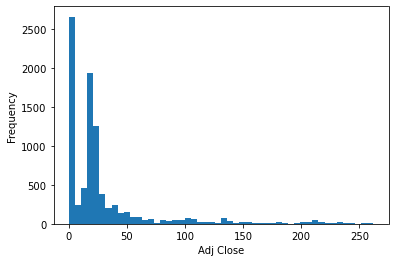

In [24]:
plt.hist(data['Adj Close'], bins = 50)
plt.xlabel("Adj Close")
plt.ylabel("Frequency")
plt.show()

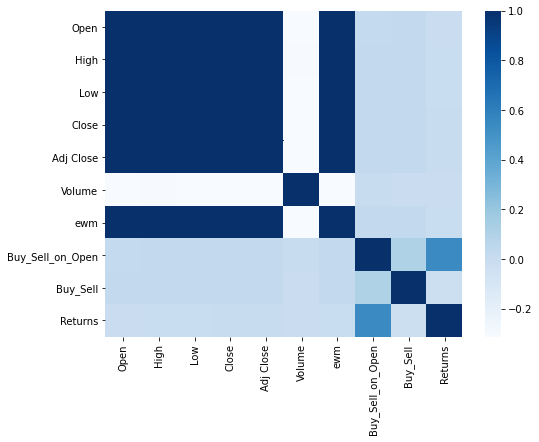

In [25]:
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

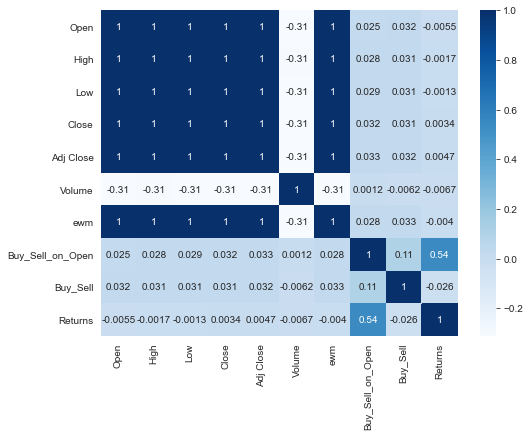

In [26]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(data.iloc[:data.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

REMOVING OUTLIERS

In [27]:
iqropen= data['Open'].quantile(0.75) - data['Open'].quantile(0.25) 
iqropen

32.89374923706055

In [28]:
uopen = data['Open'].quantile(0.75)+(iqropen*1.5)
lopen = data['Open'].quantile(0.25)-(iqropen*1.5)
print(uopen, lopen)

86.07812309265137 -45.49687385559082


In [29]:
iqrhigh = data['High'].quantile(0.75) - data['High'].quantile(0.25) 
iqrhigh

33.122070491313934

In [30]:
uhigh = data['High'].quantile(0.75)+(iqrhigh*1.5)
lhigh = data['High'].quantile(0.25)-(iqrhigh*1.5)
print(uhigh,lhigh)

86.6831057369709 -45.805176228284836


In [31]:
iqrclose = data['Close'].quantile(0.75) - data['Close'].quantile(0.25) 
iqrclose

32.81593656539917

In [32]:
uclose= data['Close'].quantile(0.75)+(iqrclose*1.5)
lclose = data['Close'].quantile(0.25)-(iqrclose*1.5)
print(uclose,lclose)

85.89140439033508 -45.3723418712616


In [33]:
iqrlow = data['Low'].quantile(0.75) - data['Low'].quantile(0.25) 
iqrlow

32.3075008392334

In [34]:
ulow = data['Low'].quantile(0.75)+(iqrlow*1.5)
llow = data['Low'].quantile(0.25)-(iqrlow*1.5)
print(ulow,llow)

84.5812520980835 -44.6487512588501


In [35]:
iqradjclose = data['Adj Close'].quantile(0.75) - data['Adj Close'].quantile(0.25) 
iqradjclose

24.77411723136902

In [36]:
uadjclose = data['Adj Close'].quantile(0.75)+(iqradjclose*1.5)
ladjclose = data['Adj Close'].quantile(0.25)-(iqradjclose*1.5)
print(uadjclose,ladjclose)

64.3816157579422 -34.714853167533875


In [37]:
iqrvolume = data['Volume'].quantile(0.75) - data['Volume'].quantile(0.25) 
iqrvolume

37793900.0

In [38]:
uvolume = data['Volume'].quantile(0.75)+(iqrvolume*1.5)
lvolume = data['Volume'].quantile(0.25)-(iqrvolume*1.5)
print(uvolume, lvolume)

130081850.0 -21093750.0


In [39]:
data.loc[data['Open'] >= uopen , 'Open'] = uopen
data.loc[data['Close'] >= uclose, 'Close'] = uclose
data.loc[data['High'] >= uhigh , 'High'] = uhigh
data.loc[data['Low'] >= ulow , 'Low'] = ulow
data.loc[data['Adj Close'] >= uadjclose , 'Adj Close'] = uadjclose
data.loc[data['Volume'] >= uvolume , 'Volume'] = uvolume

In [40]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,ewm,Buy_Sell_on_Open,Buy_Sell,Returns
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,130081850.0,0.061961,1,1,0.035713
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,130081850.0,0.062256,1,0,0.017250
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400.0,0.062365,0,0,-0.025432
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400.0,0.062359,0,0,-0.017391
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060648,58435200.0,0.062196,0,0,-0.026547
...,...,...,...,...,...,...,...,...,...,...,...
8852,2021-04-27,86.078123,86.683106,84.581252,85.891404,64.381616,31014200.0,254.218901,0,0,0.001606
8853,2021-04-28,86.078123,86.683106,84.581252,85.891404,64.381616,46903100.0,254.251386,0,0,-0.028286
8854,2021-04-29,86.078123,86.683106,84.581252,85.891404,64.381616,40589000.0,254.085539,0,0,-0.008053
8855,2021-04-30,86.078123,86.683106,84.581252,85.891404,64.381616,30929200.0,253.904059,1,0,-0.001307


<AxesSubplot:>

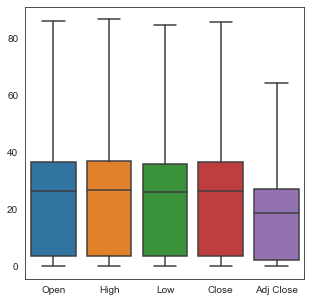

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data[["Open","High","Low","Close","Adj Close"]])

<AxesSubplot:>

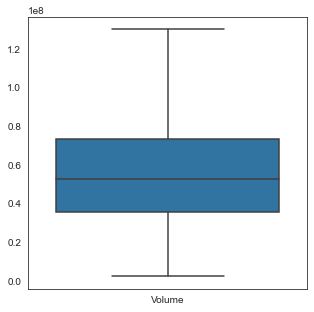

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data[["Volume"]])

# MODELLING THE DATASET

In [43]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,ewm,Buy_Sell_on_Open,Buy_Sell,Returns
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,130081850.0,0.061961,1,1,0.035713
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,130081850.0,0.062256,1,0,0.017250
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400.0,0.062365,0,0,-0.025432
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400.0,0.062359,0,0,-0.017391
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060648,58435200.0,0.062196,0,0,-0.026547
...,...,...,...,...,...,...,...,...,...,...,...
8852,2021-04-27,86.078123,86.683106,84.581252,85.891404,64.381616,31014200.0,254.218901,0,0,0.001606
8853,2021-04-28,86.078123,86.683106,84.581252,85.891404,64.381616,46903100.0,254.251386,0,0,-0.028286
8854,2021-04-29,86.078123,86.683106,84.581252,85.891404,64.381616,40589000.0,254.085539,0,0,-0.008053
8855,2021-04-30,86.078123,86.683106,84.581252,85.891404,64.381616,30929200.0,253.904059,1,0,-0.001307


In [44]:
data.reset_index(inplace = True)

In [45]:
data['Year'] = pd.to_datetime(data['Date'] , format = '%Y-%m-%d').dt.year
data['Month'] = pd.to_datetime(data['Date'] , format = '%Y-%m-%d').dt.month
data['Day'] = pd.to_datetime(data['Date'] , format = '%Y-%m-%d').dt.day

In [46]:
data.drop('Date' , axis =1 , inplace = True)

In [47]:
data.describe()

,index,Open,High,Low,Close,Adj Close,Volume,ewm,Buy_Sell_on_Open,Buy_Sell,Returns,Year,Month,Day
count,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8.856000e+03,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000
mean,4428.500000,28.673776,28.960124,28.305047,28.661078,21.739371,5.752432e+07,29.617811,0.506098,0.505420,0.001170,2003.247855,6.528229,15.743790
std,2556.651325,25.347360,25.529522,24.969810,25.309559,20.155370,2.895568e+07,43.555613,0.499991,0.499999,0.021443,10.152908,3.427674,8.748482
min,1.000000,0.090278,0.092014,0.089410,0.090278,0.057340,2.304000e+06,0.060865,0.000000,0.000000,-0.301159,1986.000000,1.000000,1.000000
25%,2214.750000,3.843750,3.877930,3.812500,3.851563,2.446323,3.559710e+07,2.432449,0.000000,0.000000,-0.009211,1994.000000,4.000000,8.000000
50%,4428.500000,26.590000,26.879999,26.290001,26.590000,18.692731,5.269610e+07,18.618773,1.000000,1.000000,0.000358,2003.000000,7.000000,16.000000
75%,6642.250000,36.737499,37.000000,36.120001,36.667500,27.220440,7.339100e+07,27.443159,1.000000,1.000000,0.011336,2012.000000,10.000000,23.000000
max,8856.000000,86.078123,86.683106,84.581252,85.891404,64.381616,1.300818e+08,254.251386,1.000000,1.000000,0.195652,2021.000000,12.000000,31.000000


In [48]:
import pickle

In [50]:
pickle_out = open("microsoft.pickle","wb")
pickle.dump(data, pickle_out)
pickle_out.close()